In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv("C:/Users/Kartik/Downloads/Titanic-Dataset.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Cleaning the dataset

In [6]:
agemean = df["Age"].mean()
df["Age"].fillna(value = agemean , inplace = True)

In [7]:
df = df.dropna(subset = ['Embarked'])

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## Data visualisation

<Axes: xlabel='Sex', ylabel='count'>

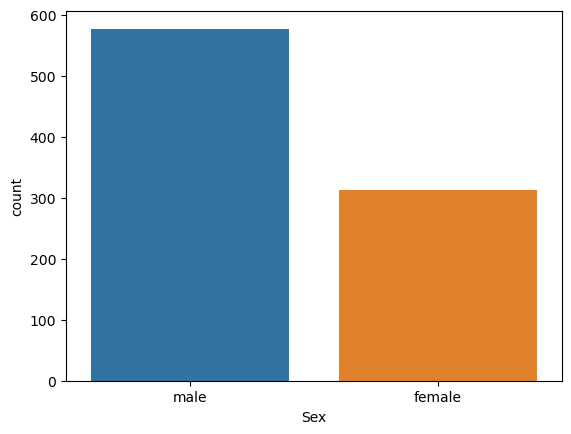

In [9]:
sns.countplot(x = "Sex" , data = df )

<Axes: xlabel='Sex', ylabel='count'>

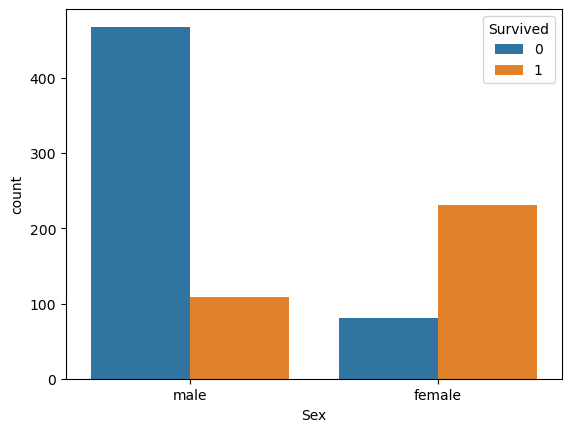

In [10]:
sns.countplot(df ,x = 'Sex' , hue = "Survived" )

<Axes: xlabel='Pclass', ylabel='count'>

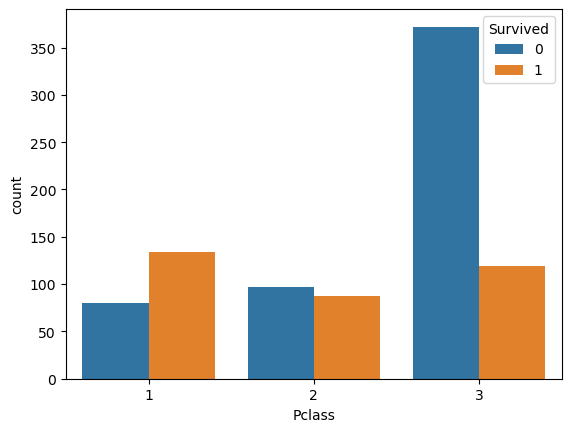

In [11]:
sns.countplot(df ,x = 'Pclass' , hue = "Survived")

## Converting categorical data into numerical data

In [12]:
labelencode = LabelEncoder()

In [13]:
df["Sex"] = labelencode.fit_transform(df["Sex"])
df["Embarked"] = labelencode.fit_transform(df["Embarked"])

C:\Users\Kartik\AppData\Local\Temp\ipykernel_1856\3417084851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex"] = labelencode.fit_transform(df["Sex"])
C:\Users\Kartik\AppData\Local\Temp\ipykernel_1856\3417084851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Embarked"] = labelencode.fit_transform(df["Embarked"])


In [14]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,0


In [15]:
Y = df["Survived"]
X = df.drop(columns = ["PassengerId","Name","Ticket","Cabin","Survived"])


In [16]:
Xtrain, Xtest,Ytrain,Ytest = train_test_split(X,Y)

In [17]:
clf = RandomForestClassifier()

In [18]:
clf.fit(Xtrain,Ytrain)

RandomForestClassifier()

In [19]:
Ytrainpred = clf.predict(Xtrain)

In [20]:
f1_score(Ytrainpred,Ytrain)

0.9779559118236473

In [21]:
accuracy_score(Ytrainpred,Ytrain)

0.9834834834834835

## Confusion Matrix for training data

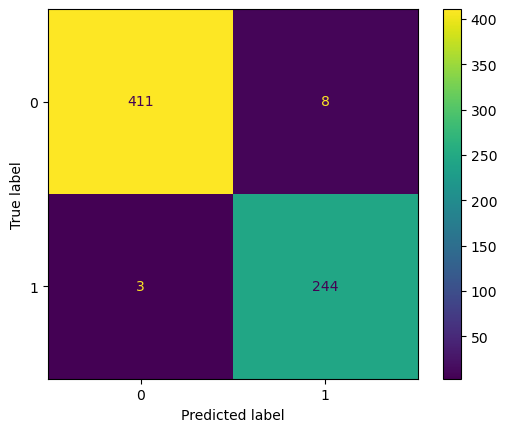

In [22]:
cm = confusion_matrix(Ytrainpred,Ytrain)
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = Ytrain.unique())
disp.plot()

In [23]:
clf.fit(Xtest,Ytest)

RandomForestClassifier()

In [24]:
Ytestpred = clf.predict(Xtest)

In [25]:
f1_score(Ytestpred,Ytest)

0.9943502824858756

In [26]:
accuracy_score(Ytestpred,Ytest)

0.9955156950672646

## Confusing Matrix for testing data

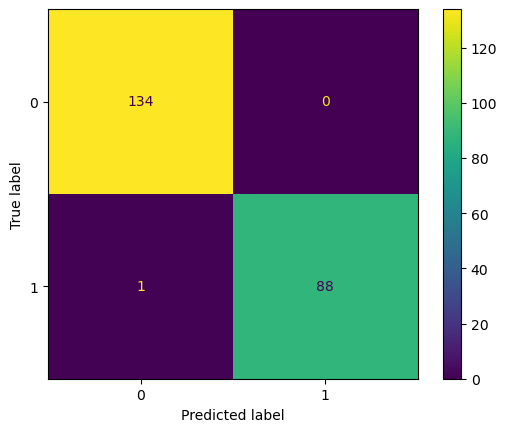

In [27]:
cm = confusion_matrix(Ytestpred,Ytest)
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = Ytrain.unique())
disp.plot()